This assessment has 6 multi-part questions that will all use the setup below.

Game attendance in baseball varies partly as a function of how well a team is playing.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.1)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')


from pycaret.regression import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("teamssmall.csv")

In [3]:
df

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,X2B,X3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,avg_attendance
0,1961,AL,BAL,BAL,NaN,3,163,82,95,67,NaN,NaN,N,N,691,5481,1393,227,36,149,581,902,39,30,NaN,NaN,588,526,3.22,54,21,33,4413,1226,109,617,926,126,173,0.980,Baltimore Orioles,Memorial Stadium,951089,96,96,BAL,BAL,BAL,5834.901840
1,1961,AL,BOS,BOS,NaN,6,163,82,76,86,NaN,NaN,N,N,729,5508,1401,251,37,112,647,847,56,36,NaN,NaN,792,687,4.29,35,6,30,4326,1472,167,679,831,143,140,0.977,Boston Red Sox,Fenway Park II,850589,102,103,BOS,BOS,BOS,5218.337423
2,1961,AL,CHA,CHW,NaN,4,163,81,86,76,NaN,NaN,N,N,765,5556,1475,216,46,138,550,612,100,40,NaN,NaN,726,653,4.06,39,3,33,4344,1491,158,498,814,128,138,0.980,Chicago White Sox,Comiskey Park,1146019,99,97,CHW,CHA,CHA,7030.791411
3,1961,NL,CHN,CHC,NaN,7,156,78,64,90,NaN,NaN,N,N,689,5344,1364,238,51,176,539,1027,35,25,NaN,NaN,800,689,4.48,34,6,25,4155,1492,165,465,755,183,175,0.970,Chicago Cubs,Wrigley Field,673057,101,104,CHC,CHN,CHN,4314.467949
4,1961,NL,CIN,CIN,NaN,1,154,77,93,61,NaN,NaN,Y,N,710,5243,1414,247,35,158,423,761,70,33,NaN,NaN,653,575,3.78,46,12,40,4110,1300,147,500,829,134,124,0.977,Cincinnati Reds,Crosley Field,1117603,102,101,CIN,CIN,CIN,7257.162338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,2001,NL,SFN,SFG,W,2,162,81,90,72,N,N,N,N,799,5612,1493,304,40,235,625,1090,57,42,50.0,54.0,748,680,4.18,3,8,47,4390,1437,145,579,1080,118,170,0.981,San Francisco Giants,PacBell Park,3311958,93,92,SFG,SFN,SFN,20444.185185
1022,2001,NL,SLN,STL,C,2,162,82,93,69,N,Y,N,N,814,5450,1469,274,32,199,529,1089,91,35,65.0,50.0,684,627,3.93,8,11,38,4306,1389,196,526,1083,110,156,0.982,St. Louis Cardinals,Busch Stadium II,3109578,100,99,STL,SLN,SLN,19194.925926
1023,2001,AL,TBA,TBD,E,5,162,81,62,100,N,N,N,N,672,5524,1426,311,21,121,456,1116,115,52,54.0,25.0,887,781,4.94,1,6,30,4271,1513,207,569,1030,139,144,0.977,Tampa Bay Devil Rays,Tropicana Field,1298365,98,100,TBD,TBA,TBA,8014.598765
1024,2001,AL,TEX,TEX,W,4,162,82,73,89,N,N,N,N,890,5685,1566,326,23,246,548,1093,97,32,75.0,55.0,968,913,5.71,4,3,37,4315,1670,222,596,951,114,167,0.981,Texas Rangers,The Ballpark at Arlington,2831021,104,105,TEX,TEX,TEX,17475.438272


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          1026 non-null   int64  
 1   lgID            1026 non-null   object 
 2   teamID          1026 non-null   object 
 3   franchID        1026 non-null   object 
 4   divID           868 non-null    object 
 5   Rank            1026 non-null   int64  
 6   G               1026 non-null   int64  
 7   Ghome           1026 non-null   int64  
 8   W               1026 non-null   int64  
 9   L               1026 non-null   int64  
 10  DivWin          840 non-null    object 
 11  WCWin           204 non-null    object 
 12  LgWin           998 non-null    object 
 13  WSWin           998 non-null    object 
 14  R               1026 non-null   int64  
 15  AB              1026 non-null   int64  
 16  H               1026 non-null   int64  
 17  X2B             1026 non-null   i

In [5]:
df.describe(include='all')

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,X2B,X3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,avg_attendance
count,1026.000000,1026,1026,1026,868,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,840,204,998,998,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,844.000000,844.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026,1026,1.026000e+03,1026.000000,1026.000000,1026,1026,1026,1026.000000
unique,NaN,2,37,30,3,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,70,NaN,NaN,NaN,36,37,36,NaN
top,NaN,AL,DET,DET,E,NaN,NaN,NaN,NaN,NaN,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,St. Louis Cardinals,Dodger Stadium,NaN,NaN,NaN,NYY,DET,DET,NaN
freq,NaN,526,41,41,398,NaN,NaN,NaN,NaN,NaN,694,190,918,958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,44,NaN,NaN,NaN,41,41,41,NaN
mean,1982.368421,NaN,NaN,NaN,NaN,3.762183,158.516569,79.257310,79.184211,79.184211,NaN,NaN,NaN,NaN,689.997076,5397.727096,1394.705653,239.181287,35.076998,135.502924,522.158869,897.473684,103.019493,52.039961,36.097156,46.054502,689.997076,617.341131,3.919951,26.723197,10.098441,35.204678,4258.733918,1394.705653,135.502924,522.158869,897.473684,128.942495,148.014620,0.978895,NaN,NaN,1.694421e+06,100.225146,100.221248,NaN,NaN,NaN,10717.644004
std,11.663357,NaN,NaN,NaN,NaN,2.086419,11.712666,5.952992,12.710517,12.651509,NaN,NaN,NaN,NaN,103.984225,404.028422,132.757865,40.842831,10.660203,39.731618,78.998803,139.788348,44.210468,16.731724,14.485974,9.633466,104.651650,99.022001,0.596704,16.411162,4.589815,9.537859,316.883772,133.924825,33.875129,78.381812,145.544917,23.700440,21.188648,0.003299,NaN,NaN,7.641153e+05,4.652719,4.766834,NaN,NaN,NaN,4818.600958
min,1961.000000,NaN,NaN,NaN,NaN,1.000000,103.000000,44.000000,37.000000,40.000000,NaN,NaN,NaN,NaN,329.000000,3493.000000,797.000000,119.000000,11.000000,32.000000,275.000000,379.000000,17.000000,11.000000,7.000000,18.000000,331.000000,293.000000,2.450000,1.000000,0.000000,10.000000,2767.000000,827.000000,40.000000,268.000000,388.000000,57.000000,74.000000,0.967000,NaN,NaN,3.067630e+05,90.000000,90.000000,NaN,NaN,NaN,1893.598765
25%,1973.000000,NaN,NaN,NaN,NaN,2.000000,161.000000,81.000000,71.000000,71.000000,NaN,NaN,NaN,NaN,628.250000,5423.000000,1343.000000,210.250000,28.000000,108.000000,472.250000,816.000000,70.000000,41.000000,26.000000,40.000000,626.000000,554.000000,3.492500,13.000000,7.000000,29.000000,4300.000000,1340.250000,112.000000,475.000000,807.250000,113.000000,135.000000,0.977000,NaN,NaN,1.097446e+06,97.000000,97.000000,NaN,NaN,NaN,6932.608571
50%,1983.000000,NaN,NaN,NaN,NaN,4.000000,162.000000,81.000000,80.000000,79.000000,NaN,NaN,NaN,NaN,689.500000,5498.000000,1408.500000,238.000000,34.000000,132.000000,520.000000,903.500000,99.000000,50.500000,33.000000,46.000000,688.000000,615.000000,3.855000,25.000000,10.000000,35.000000,4341.000000,1408.000000,131.000000,521.000000,899.000000,130.000000,148.500000,0.979000,NaN,NaN,1.589698e+06,100.000000,100.000000,NaN,NaN,NaN,10084.644550
75%,1993.000000,NaN,NaN,NaN,NaN,5.000000,162.000000,81.000000,88.000000,88.000000,NaN,NaN,NaN,NaN,755.000000,5563.750000,1475.000000,268.000000,41.000000,161.000000,573.000000,986.750000,131.000000,61.000000,43.000000,52.000000,754.750000,679.000000,4.287500,39.000000,13.000000,42.000000,4377.000000,1476.000000,158.000000,572.000000,994.000000,143.000000,162.000000,0.981000,NaN,NaN,2.174151e+06,103.000000,103.000000,NaN,NaN,NaN,13854.381173


In [6]:
df.shape

(1026, 49)

In [7]:
df.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', 'X2B',
       'X3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro', 'avg_attendance'],
      dtype='object')

### Questions

In [8]:
###################### QUESTION 1 a/b/c #####################
# Use runs (R) per game to predict average attendance.
# For every 1 run scored per game, attendance increases by how much?

# Use home runs (HR) per game to predict average attendance.
# For every 1 home run hit per game, attendance increases by how much?

# Use number of wins to predict attendance; do not normalize for number of games.
# For every game won in a season, how much does average attendance increase?

# Suppose a team won zero games in a season.
# Predict the average attendance.

# Use year to predict average attendance.
# How much does average attendance increase each year?

In [9]:
###################### QUESTION 5 a#####################
# Use your model from Question 4 to predict average attendance for teams in 2002
#  in the original Teams data frame.

In [10]:
df1 = df[['yearID','W','R','HR','avg_attendance']]

In [11]:
df1

,yearID,W,R,HR,avg_attendance
0,1961,95,691,149,5834.901840
1,1961,76,729,112,5218.337423
2,1961,86,765,138,7030.791411
3,1961,64,689,176,4314.467949
4,1961,93,710,158,7257.162338
...,...,...,...,...,...
1021,2001,90,799,235,20444.185185
1022,2001,93,814,199,19194.925926
1023,2001,62,672,121,8014.598765
1024,2001,73,890,246,17475.438272


In [12]:
exp = setup(data=df1, target='avg_attendance',train_size=0.8, session_id=0, normalize=True, categorical_features=['yearID'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,0
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1026, 5)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
linearreg = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2484.3902,9.771350e+06,3125.9159,0.5193,0.2970,0.2673
1,2756.8628,1.400553e+07,3742.3960,0.4027,0.4909,0.2794
2,2708.1702,1.201741e+07,3466.6134,0.4939,0.3913,0.2951
3,2506.6777,9.974389e+06,3158.2256,0.5693,0.3310,0.2633
4,2856.9395,1.249594e+07,3534.9600,0.4711,0.3784,0.3493
5,2289.7668,8.414448e+06,2900.7668,0.5466,0.2752,0.2162
6,2620.3891,1.129779e+07,3361.2188,0.5549,0.3430,0.3086
7,2775.4836,1.274878e+07,3570.5434,0.4342,0.4597,0.3298
8,2684.4964,1.330520e+07,3647.6297,0.5113,0.3287,0.2662
9,2848.3892,1.448206e+07,3805.5303,0.4161,0.4165,0.2708


In [14]:
evaluate_model(linearreg)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [15]:
predict_model(linearreg)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2573.1836,1.051300e+07,3242.3759,0.5227,0.3127,0.2822


,W,R,HR,yearID_1961.0,yearID_1962.0,yearID_1963.0,yearID_1964.0,yearID_1965.0,yearID_1966.0,yearID_1967.0,...,yearID_1994.0,yearID_1995.0,yearID_1996.0,yearID_1997.0,yearID_1998.0,yearID_1999.0,yearID_2000.0,yearID_2001.0,avg_attendance,Label
0,-1.667481,-1.520174,-0.516287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19994.342105,15630.0
1,0.536494,0.269431,0.037698,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7062.117284,7540.0
2,-1.352627,-1.077584,-0.264476,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3704.358025,3378.0
3,-0.486780,0.384889,-0.214113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8054.729560,8859.0
4,0.300354,2.241845,2.606175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24002.796296,14528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.536494,0.432997,-0.264476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11785.388889,8588.0
202,0.379067,1.703040,-0.314838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7221.906832,9302.0
203,-0.250640,0.635049,-0.289657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7350.766871,9517.0
204,0.142927,-0.144295,-1.372446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9922.938272,10086.0


In [16]:
###################### QUESTION 2 a #####################
# Game wins, runs per game and home runs per game are positively correlated with attendance.
#  We saw in the course material that runs per game and home runs per game are correlated
#  with each other. Are wins and runs per game or wins and home runs per game correlated?

In [17]:
# What is the correlation coefficient for wins and runs per game?
df[['W','R']].corr()

,W,R
W,1.000000,0.602849
R,0.602849,1.000000


In [18]:
# What is the correlation coefficient for wins and home runs per game?
df[['W','HR']].corr()

,W,HR
W,1.000000,0.380276
HR,0.380276,1.000000


In [19]:
df.corr()

,yearID,Rank,G,Ghome,W,L,R,AB,H,X2B,...,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF,avg_attendance
yearID,1.000000,-0.275632,-0.122574,-0.121070,-0.052902,-0.053149,0.370657,-0.055421,0.197193,0.616155,...,0.379270,0.151488,0.266181,-0.471933,-0.056036,0.451175,0.573156,0.002138,0.007254,0.591767
Rank,-0.275632,1.000000,0.064956,0.064236,-0.694494,0.754648,-0.444016,0.011911,-0.246758,-0.294940,...,0.085993,0.219010,-0.157712,0.347260,0.088485,-0.374905,-0.466052,-0.006438,0.144786,-0.477120
G,-0.122574,0.064956,1.000000,0.984148,0.465015,0.459204,0.448682,0.977631,0.733870,0.350362,...,0.289995,0.465531,0.472408,0.450505,0.492685,-0.083362,0.105124,-0.006039,-0.006854,-0.079859
Ghome,-0.121070,0.064236,0.984148,1.000000,0.454946,0.454477,0.440347,0.961086,0.719246,0.342086,...,0.293141,0.459432,0.463566,0.440659,0.486074,-0.078163,0.109300,-0.003432,-0.001733,-0.072449
W,-0.052902,-0.694494,0.465015,0.454946,1.000000,-0.572373,0.602849,0.494045,0.574222,0.336769,...,-0.029590,-0.090787,0.370257,-0.056433,0.163383,0.274577,0.407378,0.018418,-0.141680,0.319412
L,-0.053149,0.754648,0.459204,0.454477,-0.572373,1.000000,-0.186810,0.409673,0.105161,-0.008442,...,0.300262,0.524929,0.067077,0.470198,0.292762,-0.348755,-0.307584,-0.025069,0.134694,-0.390368
R,0.370657,-0.444016,0.448682,0.440347,0.602849,-0.186810,1.000000,0.561694,0.833620,0.749631,...,0.595059,0.327687,0.401484,-0.092246,0.330274,0.273013,0.491517,0.171238,0.081219,0.408283
AB,-0.055421,0.011911,0.977631,0.961086,0.494045,0.409673,0.561694,1.000000,0.838794,0.457290,...,0.354094,0.479782,0.484196,0.406180,0.517169,-0.040462,0.158074,0.032428,0.019752,-0.022968
H,0.197193,-0.246758,0.733870,0.719246,0.574222,0.105161,0.833620,0.838794,1.000000,0.708624,...,0.452637,0.392947,0.408924,0.156614,0.476623,0.131402,0.359745,0.160465,0.101499,0.223398
X2B,0.616155,-0.294940,0.350362,0.342086,0.336769,-0.008442,0.749631,0.457290,0.708624,1.000000,...,0.510488,0.297231,0.411442,-0.196017,0.233853,0.345710,0.480858,0.172415,0.127100,0.412513


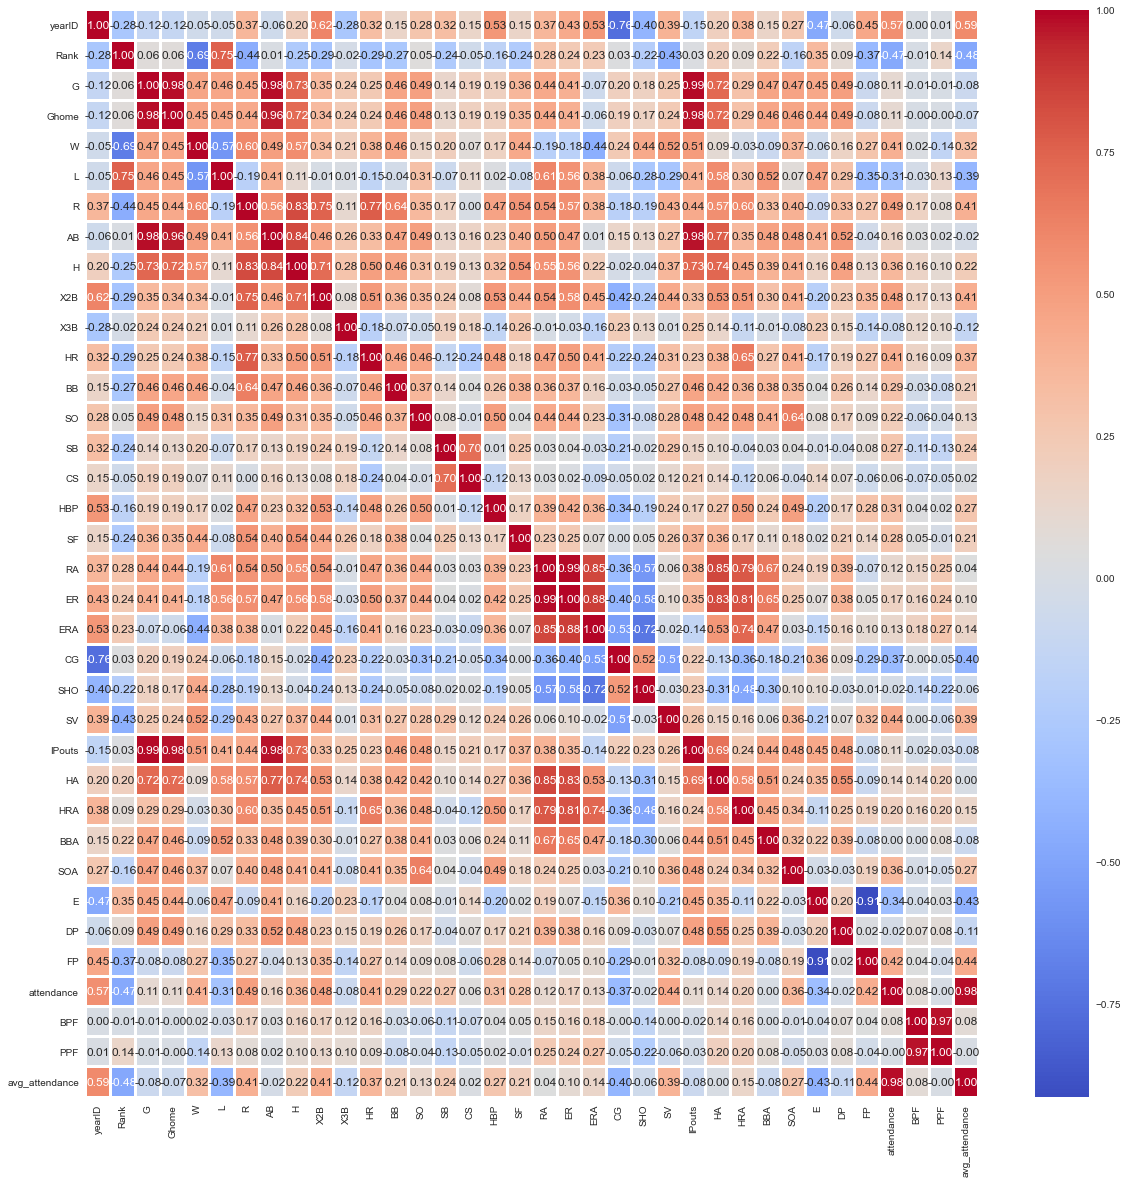

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

In [21]:
###################### QUESTION 3 a/b/c #####################
# Stratify Teams_small by wins: divide number of wins by 10 and then round to the nearest
#  integer. Keep only strata 5 through 10, which have 20 or more data points.

In [22]:
# How many observations are in the 8 win strata?

In [23]:
stratteams = pd.read_csv("strat.csv")

In [24]:
stratteams

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,avg_attendance,strat
0,1961,AL,BAL,BAL,NaN,3,163,82,95,67,...,Baltimore Orioles,Memorial Stadium,951089,96,96,BAL,BAL,BAL,5834.901840,10
1,1961,AL,BOS,BOS,NaN,6,163,82,76,86,...,Boston Red Sox,Fenway Park II,850589,102,103,BOS,BOS,BOS,5218.337423,8
2,1961,AL,CHA,CHW,NaN,4,163,81,86,76,...,Chicago White Sox,Comiskey Park,1146019,99,97,CHW,CHA,CHA,7030.791411,9
3,1961,NL,CHN,CHC,NaN,7,156,78,64,90,...,Chicago Cubs,Wrigley Field,673057,101,104,CHC,CHN,CHN,4314.467949,6
4,1961,NL,CIN,CIN,NaN,1,154,77,93,61,...,Cincinnati Reds,Crosley Field,1117603,102,101,CIN,CIN,CIN,7257.162338,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,2001,NL,SFN,SFG,W,2,162,81,90,72,...,San Francisco Giants,PacBell Park,3311958,93,92,SFG,SFN,SFN,20444.185185,9
1007,2001,NL,SLN,STL,C,2,162,82,93,69,...,St. Louis Cardinals,Busch Stadium II,3109578,100,99,STL,SLN,SLN,19194.925926,9
1008,2001,AL,TBA,TBD,E,5,162,81,62,100,...,Tampa Bay Devil Rays,Tropicana Field,1298365,98,100,TBD,TBA,TBA,8014.598765,6
1009,2001,AL,TEX,TEX,W,4,162,82,73,89,...,Texas Rangers,The Ballpark at Arlington,2831021,104,105,TEX,TEX,TEX,17475.438272,7


In [25]:
stratteams['strat'].value_counts()

8     338
9     227
7     195
10    108
6     108
5      35
Name: strat, dtype: int64

In [26]:
stratteams.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', 'X2B',
       'X3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro', 'avg_attendance', 'strat'],
      dtype='object')

In [27]:
slope = stratteams[['avg_attendance', 'strat']]
slope

,avg_attendance,strat
0,5834.901840,10
1,5218.337423,8
2,7030.791411,9
3,4314.467949,6
4,7257.162338,9
...,...,...
1006,20444.185185,9
1007,19194.925926,9
1008,8014.598765,6
1009,17475.438272,7


In [28]:
# Calculate the slope of the regression line predicting average attendance given
#  runs per game for each of the win strata. Which win stratum has the largest
#  regression line slope?

In [29]:
exp = setup(data=slope, target='avg_attendance',train_size=0.8, session_id=0, normalize=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,0
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1011, 2)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [30]:
linear2 = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3549.3439,2.034908e+07,4510.9952,0.0849,0.4314,0.3975
1,3405.0491,1.793705e+07,4235.2150,0.1143,0.4195,0.3892
2,3698.5546,1.896740e+07,4355.1584,0.0535,0.5004,0.5326
3,3610.9373,2.023855e+07,4498.7272,0.0837,0.4276,0.3983
4,3662.6439,2.188504e+07,4678.1450,0.0897,0.4513,0.4184
5,3471.0206,1.987997e+07,4458.6955,0.0697,0.4420,0.4047
6,3539.7394,2.004293e+07,4476.9335,0.0519,0.4195,0.3839
7,3472.9015,1.831793e+07,4279.9454,0.0479,0.4601,0.4620
8,3902.6021,2.372322e+07,4870.6487,0.0513,0.4868,0.4748
9,3735.1532,2.277319e+07,4772.1267,0.1003,0.4425,0.3923


In [31]:
evaluate_model(linear2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
# Calculate the slope of the regression line predicting average attendance given
#  HR per game for each of the win strata. Which win stratum has the largest
#  regression line slope?

In [33]:
###################### QUESTION 4 a #####################
# Fit a multivariate regression determining the effects of runs per game,
#  home runs per game, wins, and year on average attendance. Use the original
#  Teams_small wins column, not the win strata from question 3.

In [34]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,3604.794600,20411435.887800,4513.659100,0.074700,0.448100,0.425400
1,Bayesian Ridge,3608.604600,20423423.153400,4515.090700,0.074200,0.449100,0.427300
2,Ridge Regression,3607.390400,20431849.276700,4516.023000,0.073800,0.448700,0.426300
3,Lasso Least Angle Regression,3608.968900,20434046.929100,4516.267400,0.073700,0.448900,0.426800
4,Lasso Regression,3607.471500,20435999.370600,4516.481100,0.073600,0.448700,0.426200
5,Extreme Gradient Boosting,3607.359400,20436077.089000,4516.487600,0.073600,0.448600,0.426100
6,Gradient Boosting Regressor,3607.393900,20436096.644500,4516.490700,0.073600,0.448600,0.426100
7,Extra Trees Regressor,3607.390000,20436244.516900,4516.507300,0.073500,0.448600,0.426100
8,Random Forest,3607.735100,20437688.235000,4516.691100,0.073500,0.448900,0.426600
9,Light Gradient Boosting Machine,3607.390600,20436237.594100,4516.506600,0.073500,0.448600,0.426100
